Prior to running the below, note that one must first compile XPP with the provided makefile (but change the X11 library location to -L/usr/include/X11 for DFLAGS and -I/usr/include/X11 for CFLAGS). Then libxppAPI.so is created by running the command

```gcc-9 -shared -o libxppAPI.so abort.o  cabs.o  delay_handle.o graf_par.o my_ps.o  simplenet.o      adj2.o  calc.o  dense.o  graphics.o my_rhs.o spgmr.o    aniparse.o choice_box.o derived.o histogram.o my_svg.o stiff.o       array_print.o color.o  diagram.o i_dnnt.o nullcline.o storage.o         arrayplot.o comline.o dialog_box.o i_nint.o numerics.o tabular.o        autevd.o conpar2.o do_fit.o init_conds.o odesol2.o torus.o           autlib1.o cv2.o  dormpri.o integrate.o parserslow2.o txtread.o          autlib2.o cvband.o edit_rhs.o iterativ.o pop_list.o userbut.o           autlib3.o cvdense.o eig_list.o kinescope.o pow_dd.o vector.o         autlib4.o cvdiag.o eispack.o llnlmath.o pow_di.o volterra2.o    autlib5.o cvode.o  extra.o  load_eqn.o pow_ii.o worker2.o       auto_nox.o cvspgmr.o fftn.o  lunch-new.o pp_shoot.o z_abs.o     auto_x11.o d_imag.o flags.o  main.o  r_lg10.o z_exp.o        autpp.o  d_lg10.o form_ode.o many_pops.o read_dir.o z_log.o     axes2.o  d_sign.o gear.o  markov.o rubber.o     band.o  dae_fun.o ggets.o  menu.o  scrngif.o    browse.o del_stab.o gogoauto.o menudrive.o setubv2.o /usr/lib/x86_64-linux-gnu/libX11.so```

In [1]:
# needed for C stdout
%load_ext wurlitzer

In [2]:
import ctypes as ct
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load xpp api compiled with libX11.so
xppa = ct.cdll.LoadLibrary('../xpp_source/libxppAPI.so')

In [4]:
# figure out how to initialize input array in python to pass into c
arr = (ct.c_char_p*3)()
home = os.path.expanduser("~")
arr[0] = (home+'/Dropbox/xpp-py/xpp_source/xppaut').encode('utf-8')
arr[1] = (home+'/Dropbox/xpp-py/xpp_source/ode/lecar.ode').encode('utf-8')
arr[2] = '-silent'.encode('utf-8')

In [5]:
# can not access #DEFINE macros in ctypes (try CFFI for this)
#print(ct.c_int.in_dll(xppa,"XORFX"))

In [6]:
class BROWSER(ct.Structure):
    _fields_=[("dataflag",ct.c_int),
              ("maxrow",ct.c_int),
              ("maxcol",ct.c_int)]

In [7]:
for i in range(1,3):
    print(xppa.parse_it(arr[i]))
#xppa.do_comline(3,arr)

0
0


In [8]:
xppa.do_comline(3,arr)

2

In [9]:
xppa.do_main_py(3,arr)

argv[0] = /home/youngmp/Dropbox/xpp-py/xpp_source/xppaut
argv[1] = /home/youngmp/Dropbox/xpp-py/xpp_source/ode/lecar.ode
argv[2] = -silent
myfile=lecar.ode
batchout=output.dat
PlotFormat=ps
text=                Channnels for the ML Eqns   
text= The ML eqns have three channels Calcium, potassium and leak.    
text= To set parameters click on the asterisks   
text=*  We first set the integration time to 100 and increase the current   
action=$ total=100 iapp=.1  
text= Integrate the equations and see the nice limit cycle. Draw the nullclines.   
text=*  Now we block potassium. Integrate again and look at what happens   
action=$ gk=0  
text= Draw the nullclines. Where is the V nullcline?   
text=*  Now we block both currents and integrate   
action=$ gk=0 gca=0  
text=*  Now calcium is blocked. Explore this   
action=$ gk=2 gca=0  
text=*  Back to normal.  Both currents are required for oscillations!   
action=$ gk=2 gca=1.33  
text=*   What happens with no leak???    
action=$ gl=0  
P

0

 Run complete ... 


In [10]:
xppa.my_browser.restype #get_maxrow_browser()

ctypes.c_int

In [11]:
# don't bother loading the entire array.
# #maxcol = xppa.
# dat_addr2 = xppa.get_browser_data()
# dat_addr = ct.cast(dat_addr2,ct.POINTER(ct.c_int))
# dat_c = ct.cast(dat_addr,ct.POINTER((ct.c_float*2)*2))
# dat = list(dat_c.contents)
# print(dat)

In [12]:
#my_browser = xppa.my_browser

#reference = BROWSER()
#my_browser.restype = ct.POINTER(BROWSER)

#dataP = ctypes.cast(reference.dataP, ctypes.POINTER(DATA_STRUCT))

#print(reference.dataflag)

In [13]:
maxrow = xppa.get_maxrow_browser()
maxcol = xppa.get_maxcol_browser()

data_all = np.zeros((maxrow,maxcol))

for i in range(maxcol):
    col_dat_addr = xppa.get_data_col(i)
    data_all[:,i] = list(ct.cast(col_dat_addr,ct.POINTER(ct.c_float*maxrow)).contents)

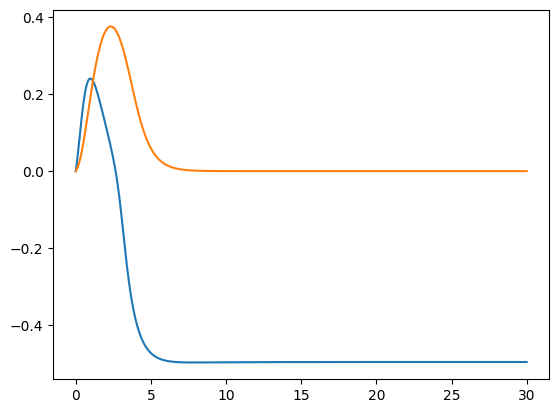

In [14]:
fig,axs = plt.subplots(1,1)
axs.plot(data_all[:,0],data_all[:,1])
axs.plot(data_all[:,0],data_all[:,2])
plt.show()

In [ ]:
xppa.parse_it(arr[2])
#xppa.do_comline(2,arr)

in comline.c:\
```extern OptionsSet notAlreadySet;```\
in storage.c:\
```extern XPPVEC xpv```\
```extern int NODE,NMarkov```

The above take the format\
```extern data_type variable_name;```\
So notAlreadySet is a variable name that has the data type OptionsSet. I don't know what this data type is.

Also see [here](https://www.geeksforgeeks.org/understanding-extern-keyword-in-c/#)

In [10]:
xppa.get_directory(arr[0])

1

In [ ]:
xppa.do_main(2,arr)